In [2]:
# conventional way to import pandas
import pandas as pd

In [3]:
# read CSV file directly from a url and save the result
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# display the last 5 row
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
# check the shape of the Dataframe (rows, columns)
data.shape

(200, 4)

In [6]:
# conventional wat to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

/home/lin/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


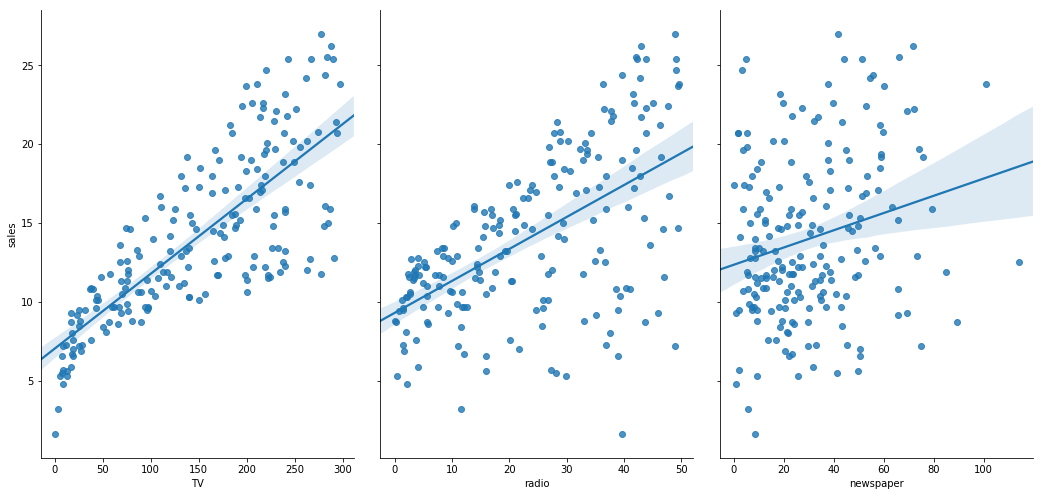

In [7]:
# visualize the relationship between the features and the response using scatterplot
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales',height = 7, aspect=0.7, kind='reg')

https://youtu.be/3ZWuPVWq7p4?t=1114

In [8]:
# create a python list of features names
features_cols = ['TV','radio','newspaper']
X = data[features_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [9]:
print(type(X))
print(X.shape)


<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [10]:
y = data['sales']
# is equivalent to y = data.sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [11]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [13]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Linear regression in scikit learn

In [14]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate 
linreg = LinearRegression()

# fit the model to the training data(learn the coefficient)
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Interpreting model coefficients

In [15]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [19]:
# pair the feature names with the coefficients
zip(features_cols, linreg.coef_)

In [20]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

## Model evaluation metrics for regression

In [22]:
# define true and predicted response values
true = [100,50,30,20]
pred = [90,50,50,30]

In [23]:
# calculate MAE by hand
print((10+0+20+10)/4)

# calculate MEA using scikit learn
from sklearn import metrics
print(metrics.mean_absolute_error(true,pred))

10.0
10.0


In [28]:
# Calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2)/4)

# calculate MSE using scikit learn
print(metrics.mean_squared_error(true,pred))

150.0
150.0


In [29]:
# Calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))

# Calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true,pred)))

12.24744871391589
12.24744871391589


In [30]:
# sales prediction computing the RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


## feature selection

In [31]:
# create a python list of feature names
feature_cols = ['TV','radio']

# use the list to select a subset of the original Dataframe
X = data[feature_cols]

# select a series from the Dataframe
y = data.sales

# split into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

# fit the model to the training data(learn the coefficient)
linreg.fit(X_train,y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

1.3879034699382888
